Model Accuracy: 83.33%

=== Sample Predictions ===
Correct Prediction Example:
   Predicted = versicolor, Actual = versicolor
   Features = [6.1 2.8]

 Wrong Prediction Example:
   Predicted = virginica, Actual = versicolor
   Features = [5.8 2.7]


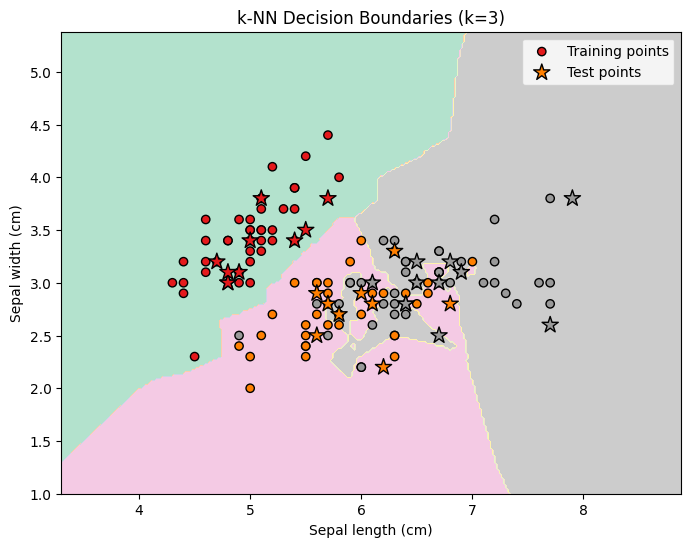

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first two features for 2D visualization (sepal length, sepal width)
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")


# ✅ Print sample predictions
correct_found = False
wrong_found = False

print("=== Sample Predictions ===")
for i in range(len(y_test)):
    predicted_label = iris.target_names[y_pred[i]]
    actual_label = iris.target_names[y_test[i]]

    if y_pred[i] == y_test[i] and not correct_found:
        print(f"Correct Prediction Example:")
        print(f"   Predicted = {predicted_label}, Actual = {actual_label}")
        print(f"   Features = {X_test[i]}")
        correct_found = True
    elif y_pred[i] != y_test[i] and not wrong_found:
        print(f"\n Wrong Prediction Example:")
        print(f"   Predicted = {predicted_label}, Actual = {actual_label}")
        print(f"   Features = {X_test[i]}")
        wrong_found = True

    if correct_found and wrong_found:
        break

if not wrong_found:
    print("\n🎉 All predictions were correct on this test set!")

# Decision Boundary Visualization
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', label="Training points")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, marker='*', s=150, edgecolor='k', label="Test points")
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title("k-NN Decision Boundaries (k=3)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# 2. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Labels
# 3. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, shuffle=True
)
# 4. Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 5. Train k-NN Model
k = 5 # You can change k if needed
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
# 6. Make Predictions
y_pred = knn.predict(X_test_scaled)
# Print correct and wrong predictions
print("\nCorrect and Wrong Predictions:")
for actual, predicted in zip(y_test, y_pred):
    if actual == predicted:
        print(f"✔ Correct: Predicted = {predicted}, Actual = {actual}")
    else:
        print(f"✘ Wrong: Predicted = {predicted}, Actual = {actual}")
# 7. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Correct and Wrong Predictions:
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 1, Actual = 1
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 0, Actual = 0
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 2, Actual = 2
✔ Correct: Predicted = 2, Actual = 2
✔ Corr